<center><img src="https://github.com/hse-ds/iad-applied-ds/blob/master/2021/hw/hw1/img/logo_hse.png?raw=1" width="1000"></center>

<h1><center>Прикладные задачи анализа данных</center></h1>
<h2><center>Домашнее задание 3: Прогнозирование временных рядов</center></h2>

# Введение

В этом задании Вам предстоит разобраться с основами анализа и прогнозирования временных рядов. 


![image](https://imgs.xkcd.com/comics/extrapolating.png)

In [90]:
!pip install orbit-ml
!pip install prophet
!pip install sktime[all_extras]

In [2]:
%matplotlib inline

from IPython import display
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np


## Задание 1 (1 балл). Поиск и предобработка данных.

В этом задании Вам необходимо _самостоятельно_ найти два временных ряда: один должен обладать месячной частотой, а второй — дневной.

Мы советуем поискать соответствующие временные ряды на платформе [kaggle](https://www.kaggle.com/datasets) или же взять один из [популярных](https://medium.com/analytics-vidhya/10-time-series-datasets-for-practice-d14fec9f21bc) временных рядов для анализа. 

**Не рекомендуется** использовать в качестве временных рядов цены финансовых инструментов в силу плохой предсказуемости изменения цен. **Запрещается** использовать готовые наборы данных из библиотек для анализа временных рядов, например, `from orbit.utils.dataset import load_iclaims`.

![bitcoin](https://avatars.mds.yandex.net/get-zen_doc/3417386/pub_6017dd4b8d30cb1780864ae0_6017f4aa8d30cb1780bf66ce/scale_1200)




В качестве отчета по заданию:

* Опишите источники временных рядов (ссылки на страницы скачивания). В случае, если данные требовали дополнительной обработки, приведите код этой обработки, загрузите данные в личное облачное хранилище и приведите ссылку на скачивание. Процесс получения временных рядов должен быть **четко** расписан и полностью **воспроизводиться**. 

* Приведите код считывания временных рядов из файлов и разделения на train/test. Соотношение размеров train/test на Ваше усмотрение, но мы советуем Вам выбрать 80% на 20%, если в test остаётся хотя бы пара лет наблюдений.



In [3]:
# скачаем данные
!wget https://raw.githubusercontent.com/rishabh89007/Time_Series_Datasets/main/Brent%20Spot%20Price.csv
!wget https://raw.githubusercontent.com/rishabh89007/Time_Series_Datasets/main/Nuclear%20Capacity.csv

--2022-04-24 13:06:06--  https://raw.githubusercontent.com/rishabh89007/Time_Series_Datasets/main/Brent%20Spot%20Price.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6732 (6.6K) [text/plain]
Saving to: ‘Brent Spot Price.csv’

Brent Spot Price.cs 100%[===================>]   6.57K  --.-KB/s    in 0s      

2022-04-24 13:06:06 (69.6 MB/s) - ‘Brent Spot Price.csv’ saved [6732/6732]

--2022-04-24 13:06:06--  https://raw.githubusercontent.com/rishabh89007/Time_Series_Datasets/main/Nuclear%20Capacity.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting respon

In [4]:
# считаем файлы
ts1 = pd.read_csv('/content/Brent Spot Price.csv')
ts2 = pd.read_csv('/content/Nuclear Capacity.csv')

In [5]:
# сделаем разбиение на train/test
ts1.columns = ['date', 'oil_spot_price']

In [6]:
ts2.columns = ['date','nuclear_capacity']

In [7]:
import pandas as pd

In [8]:
ts1.index=pd.to_datetime(ts1.date).dt.to_period('M')

In [9]:
ts2.index = pd.to_datetime(ts2.date.apply(lambda x: x[:4]+'-'+x[5:7]+'-'+x[10:]))

In [10]:
ts1.drop('date',axis=1,inplace=True)
ts2.drop('date',axis=1,inplace=True)

In [11]:
from sktime.forecasting.model_selection import temporal_train_test_split

In [12]:
y_train_1, y_test_1 = temporal_train_test_split(ts1, test_size=0.2)

In [13]:
y_train_2, y_test_2 = temporal_train_test_split(ts2, test_size=0.2)

## Задание 2. Анализ временных рядов (1 балл).

* Отрисуйте временные ряды и визуально сделайте различимым разбиение на выборки — либо вертикальной чертой, либо разными цветами.

* Постройте графики [автокорреляционных функций](https://www.machinelearningmastery.ru/time-series-in-python-exponential-smoothing-and-arima-processes-2c67f2a52788/) для выбранных временных рядов. Прокомментируйте их: являются ли временные ряды сезонными? Видна ли на графиках длина сезонной составляющей ряда?

* В случае присутствия сезонности, разбейте временной ряд на повторяющиеся фрагменты и нарисуйте их наложенными для иллюстрации этой сезонности.

In [14]:
# отрисуем временные ряды
from sktime.utils.plotting import plot_correlations
from sktime.utils.plotting import plot_series
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (23,9)

In [15]:
pip install matplotlib==3.1.3

     |████████████████████████████████| 13.1 MB 3.8 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
orbit-ml 1.1.1 requires matplotlib>=3.3.2, but you have matplotlib 3.1.3 which is incompatible.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


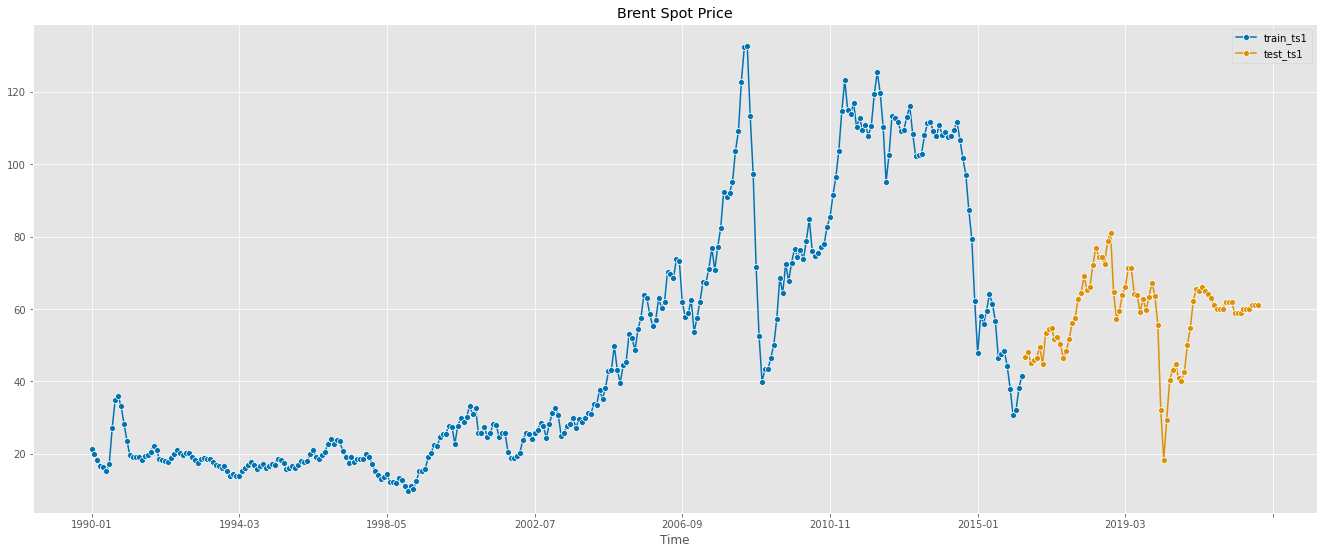

In [16]:
fig, ax = plt.subplots()
plot_series(y_train_1, y_test_1, labels = ['train_ts1','test_ts1'],ax=ax);
ax.set_xlabel('Time')
ax.set_title('Brent Spot Price')
plt.show();

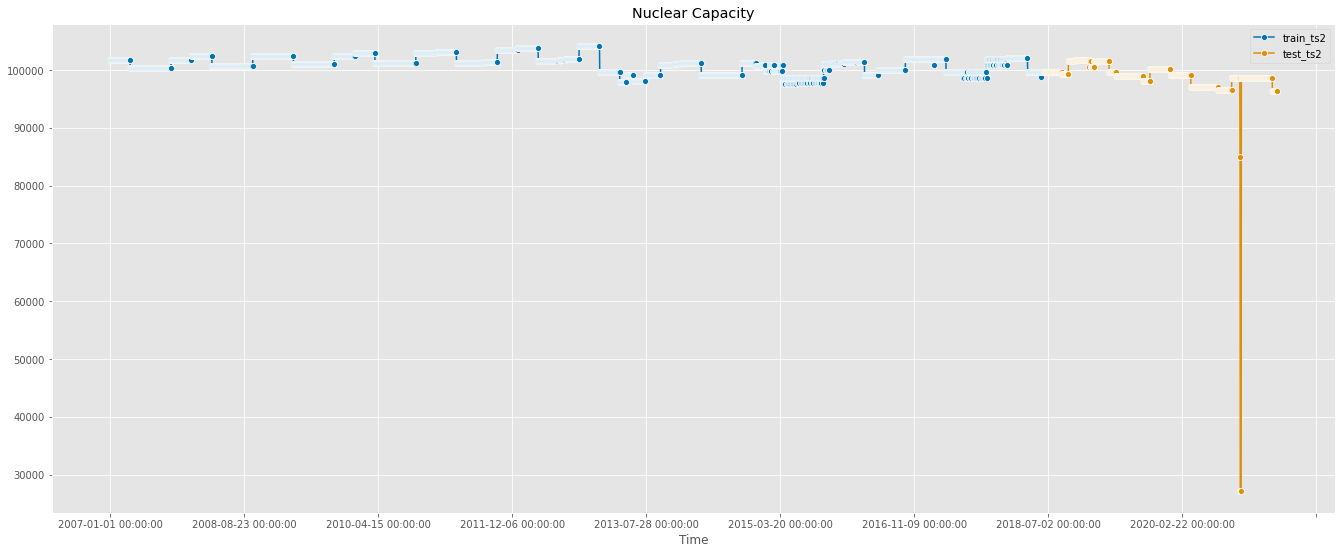

In [17]:
fig, ax = plt.subplots()
plot_series(y_train_2, y_test_2, labels = ['train_ts2','test_ts2'],ax=ax);
ax.set_xlabel('Time')
ax.set_title('Nuclear Capacity')
plt.show();

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


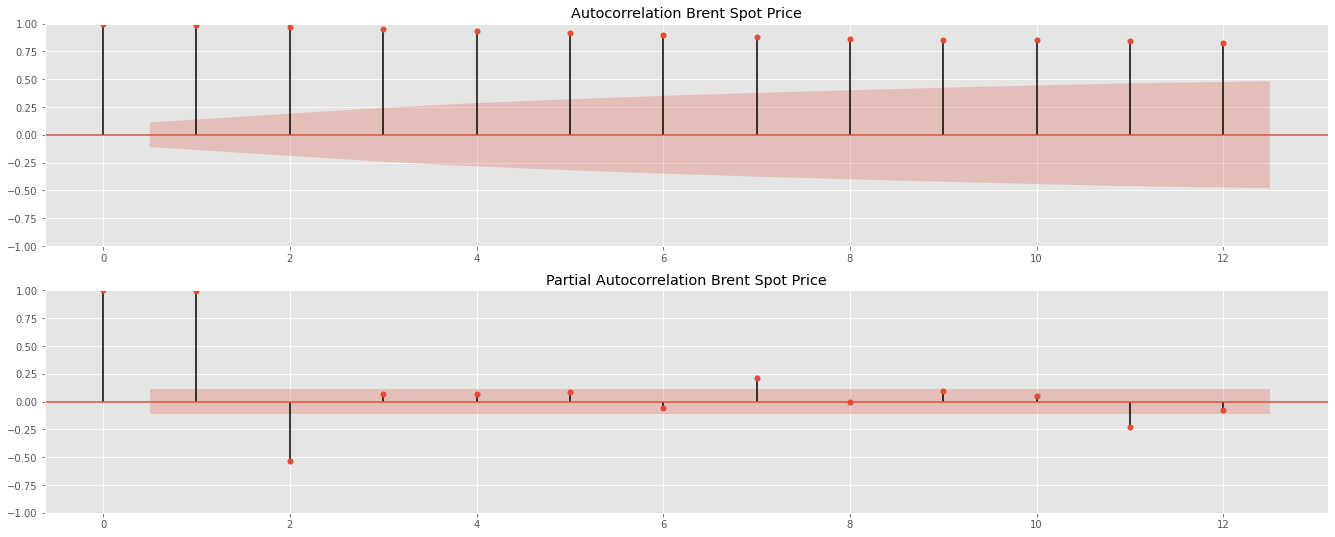

In [19]:
fig, ax = plt.subplots(2,1)
plot_acf(y_train_1, ax=ax[0], title = 'Autocorrelation Brent Spot Price',lags=12)
plot_pacf(y_train_1,ax=ax[1], title = 'Partial Autocorrelation Brent Spot Price', lags=12)
plt.show();

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


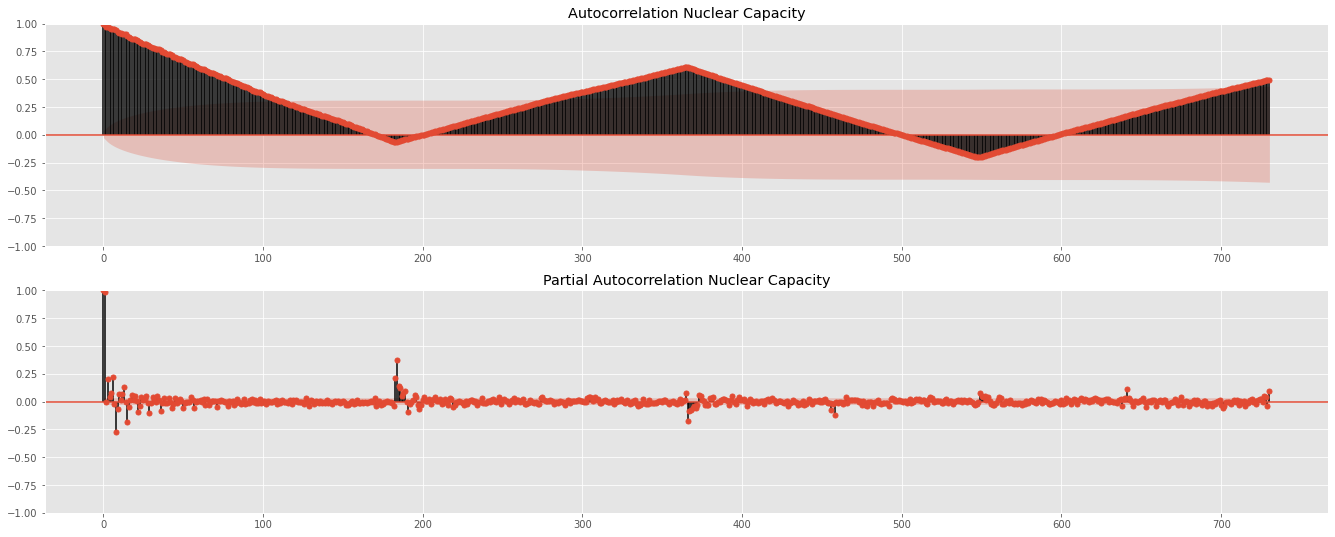

In [20]:
fig, ax = plt.subplots(2,1)
plot_acf(y_train_2, ax=ax[0], title = 'Autocorrelation Nuclear Capacity',lags=730)
plot_pacf(y_train_2,ax=ax[1], title = 'Partial Autocorrelation Nuclear Capacity', lags=730)
plt.show();

По коррелограммам сложно определить есть ли сезонность в данных, как и по графикам временных рядов. Попробуем продифференцировать ряд и посмотреть на те же показатели

Из графиков дифференцированного ряда, автокорреляции и частичной автокорреляции видно, что для первого ряда сезонность - 12 месяцев, для второго - 7 дней.

In [21]:
import seaborn as sns

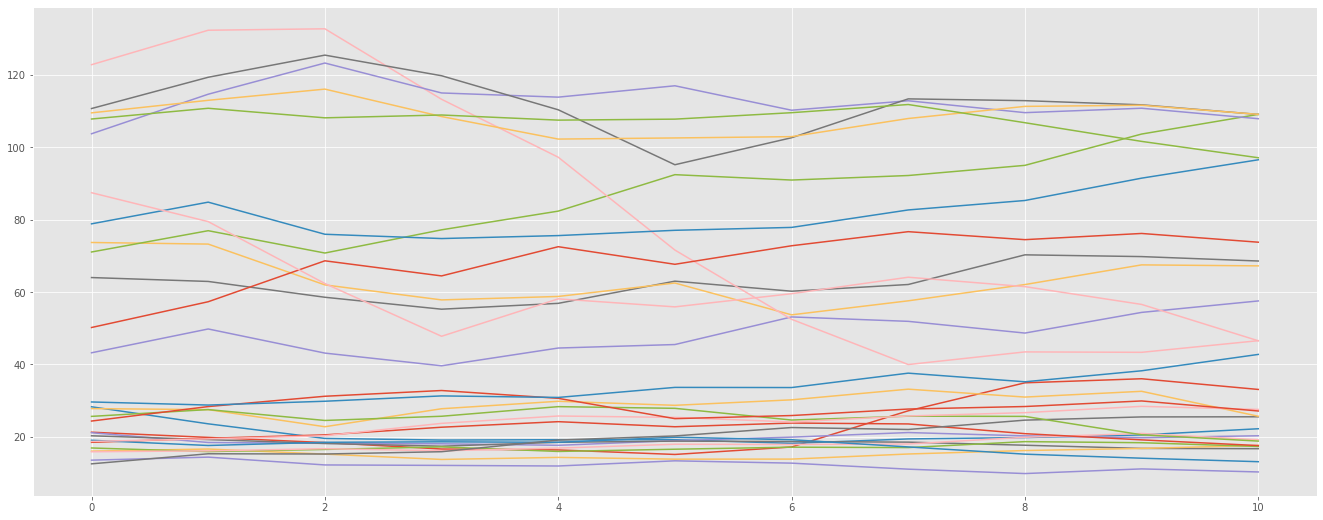

In [22]:
fig, ax = plt.subplots()
j=0
for i in range(11,len(y_train_1),11):
  df = pd.DataFrame({'y':y_train_1['oil_spot_price'][j:i].to_numpy()},index=np.arange(len(y_train_1['oil_spot_price'][j:i])))
  df.plot(ax=ax,legend=False)
  j=i

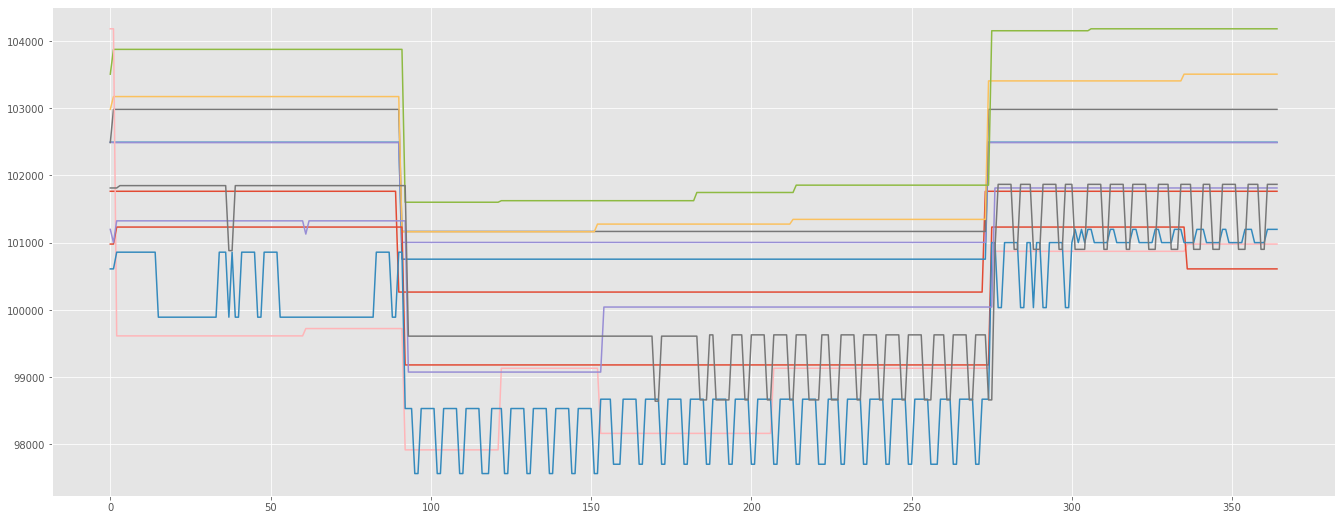

In [23]:
fig, ax = plt.subplots()
j=0
for i in range(365,len(y_train_2),365):
  df = pd.DataFrame({'y':y_train_2['nuclear_capacity'][j:i].to_numpy()},index=np.arange(len(y_train_2['nuclear_capacity'][j:i])))
  df.plot(ax=ax, legend=False)
  j=i

Кажется, сезонность рядов устроена довольно сложно. По графикам видно , что удалось поймать некоторую закономерность, но очевидно, что на одном участке в отличие от другого при той же частоте значения ряда меняются на противоположные, а также, что для какого-то участка частота меняется относительно другого.

## Задание 3. Предсказание месячного временного ряда (4 балла).

В этом задании Вам предстоит попробовать предсказать месячный временной ряд несколькими готовыми моделями со скользящим или растущим окном и выбрать среди них наилучшую.

В качестве метрики сравнения используйте MAE между истинными и предсказанными значениями ряда на тестовом отрезке.

### NaiveForecaster из sktime (1 балл).

Посчитайте предсказания следующими двумя наивными способами:

* $\hat{y}_{t+1} = y_{t}$
* $\hat{y}_{t+1} = y_{t-seasonality+1}$

In [24]:
from sktime.forecasting.naive import NaiveForecaster
from sktime.performance_metrics.forecasting import MeanAbsoluteError
from sktime.forecasting.base import ForecastingHorizon
mae = MeanAbsoluteError()
# ваш код обучения моделей здесь

In [25]:
forecaster_1 = NaiveForecaster(strategy="last", sp=1)
forecaster_1.fit(y_train_1)
fh = ForecastingHorizon(y_test_1.index, is_relative=False)
pred_1 = forecaster_1.predict(fh)

In [26]:
forecaster_12 = NaiveForecaster(strategy="last", sp=11)
forecaster_12.fit(y_train_1)
pred_12 = forecaster_12.predict(fh)

In [27]:
# посчитайте метрики на test
print('MAE NaiveForecaster при единичном лаге: ', mae(y_test_1,pred_1))

MAE NaiveForecaster при единичном лаге:  17.49415


In [28]:
print('MAE NaiveForecaster при сезонном лаге: ',mae(y_test_1,pred_12))

MAE NaiveForecaster при сезонном лаге:  16.4936625


### ARIMA/AutoArima (1 балл).

Обучите из библиотеки `sktime` модели:

* SARIMA(1, 1, 1)(1, 0, 0)[12] (`ARIMA` в `sktime`)
* Алгоритм Хиндмана-Хандакара подбора SARIMA (`AutoARIMA` в `sktime`)

In [29]:
from sktime.forecasting.arima import ARIMA, AutoARIMA

sarima = ARIMA(order=(1, 1, 1), seasonal_order=(1, 0, 0, 12),scoring='mae')

In [30]:
sarima.fit(y_train_1)

ARIMA(order=(1, 1, 1), scoring='mae', seasonal_order=(1, 0, 0, 12))

In [31]:
sarima_pred = sarima.predict(fh)

In [32]:
print('MAE SARIMA(1, 1, 1)(1, 0, 0)[12]: ',mae(y_test_1,sarima_pred))

MAE SARIMA(1, 1, 1)(1, 0, 0)[12]:  15.160204403247764


In [33]:
# посчитайте метрики на test
auto_arima = AutoARIMA(sp=12,suppress_warnings=False)
auto_arima.fit(y_train_1)
print('MAE AutoARIMA: ',mae(y_test_1,auto_arima.predict(fh)))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmo

MAE AutoARIMA:  7.643821949582301


In [34]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  316
Model:             SARIMAX(2, 1, 2)x(2, 0, [], 12)   Log Likelihood                -901.469
Date:                             Sun, 24 Apr 2022   AIC                           1816.938
Time:                                     13:07:45   BIC                           1843.206
Sample:                                          0   HQIC                          1827.433
                                             - 316                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4537      0.080     18.263      0.000       1.298       1.610
ar.L2         -0.5586      0.086     -6.528      0.000      -0.726      -0.391
ma.L1         -1.0576      0.104    -10.190      0.000      -1.261      -0.854
ma.L2          0.1617      0.114      1.424      0.154      -0.061       0.384
ar.S.L12       0.1103      0.048      2.293      0.022       0.016       0.205
ar.S.L24      -0.1774      0.056     -3.193      0.001      -0.286      -0.069
sigma2        17.8498      1.026     17.400      0.000      15.839      19.860
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                90.87
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              16.13   Skew:                            -0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### LGT/DLT (1 балл).

Обучите из библиотеки `orbit` модели LGT и DLT

In [35]:
from orbit.models import LGT
from orbit.models import DLT
y_train_1['date'] = y_train_1.index.to_timestamp()

In [36]:
y_test_1['date'] = y_test_1.index.to_timestamp()

In [37]:
class CustomCrossVal:
    def __init__(self, window_size = 100, step=80):
        self.window_size = window_size
        self.step = step

    def split(self, X):
        initial = self.window_size
        index = []
        while (initial + self.step) <= len(X):
                index.append((initial, initial+self.step))
                initial+=self.step
        return index

In [38]:
from tqdm.auto import tqdm

In [39]:
params = {
    'estimator':['stan-map','stan-mcmc'],
    'global_trend_option':['logistic','flat','linear','loglinear'],
    'damped_factor':[0.1,0.5,0.7]
}
res = []
for i in tqdm(params['estimator']):
  for j in tqdm(params['global_trend_option']):
    for k in tqdm(params['damped_factor']):
      param_mae = []
      for a,b in tqdm(CustomCrossVal(window_size = 100, step=80).split(y_train_1)):
        y_tr = y_train_1[:a]
        y_val = y_train_1[a:b]
        dlt =  DLT(
            response_col='oil_spot_price',
            date_col='date',
            estimator=i,
            seasonality=11,
            global_trend_option=j,
            damped_factor=k
        )
        dlt.fit(y_tr)
        param_mae.append(mae(y_val['oil_spot_price'],dlt.predict(y_val)['prediction']))
      res.append([i,j,k,np.mean(np.array(param_mae))])

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_05ff738ef22ce2e8a332ce639cee65cf NOW.


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


  0%|          | 0/2 [00:00<?, ?it/s]

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


  0%|          | 0/2 [00:00<?, ?it/s]

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


  0%|          | 0/2 [00:00<?, ?it/s]

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


  0%|          | 0/2 [00:00<?, ?it/s]

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


  0%|          | 0/2 [00:00<?, ?it/s]

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


  0%|          | 0/2 [00:00<?, ?it/s]

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


In [40]:
res = np.array(res)
idx = np.argmin(np.array(res[:,3], dtype='float'))
itog = res[idx]
itog

array(['stan-mcmc', 'linear', '0.7', '21.845391767968394'], dtype='<U32')

In [41]:
dlt =  DLT(
    response_col='oil_spot_price',
    date_col='date',
    estimator=itog[0],
    seasonality=11,
    global_trend_option=itog[1],
    damped_factor=float(itog[2])
)
dlt.fit(y_train_1)
print('MAE DLT: ',mae(y_test_1['oil_spot_price'],dlt.predict(y_test_1)['prediction']))

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


MAE DLT:  8.441098094827371


In [42]:
params = {
    'estimator':['stan-map','stan-mcmc']
}
res = []
for i in tqdm(params['estimator']):
  param_mae = []
  for a,b in tqdm(CustomCrossVal(window_size = 100, step=80).split(y_train_1)):
    y_tr = y_train_1[:a]
    y_val = y_train_1[a:b]
    lgt =  LGT(
        response_col='oil_spot_price',
        date_col='date',
        estimator=i,
        seasonality=11,
    )
    lgt.fit(y_tr)
    param_mae.append(mae(y_val['oil_spot_price'],lgt.predict(y_val)['prediction']))
  res.append([i,np.mean(np.array(param_mae))])

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_d372bb7bc77e1df83218127fc9dd707d NOW.


  0%|          | 0/2 [00:00<?, ?it/s]

In [43]:
res = np.array(res)
idx = np.argmin(np.array(res[:,1], dtype='float'))
itog = res[idx]
itog

array(['stan-mcmc', '24.51285464368512'], dtype='<U32')

In [44]:
lgt =  LGT(
    response_col='oil_spot_price',
    date_col='date',
    estimator=itog[0],
    seasonality=11
)
lgt.fit(y_train_1)
print('MAE LGT: ',mae(y_test_1['oil_spot_price'],lgt.predict(y_test_1)['prediction']))

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


MAE LGT:  13.327393034146189


### ETS (1 балл).

Обучите из библиотеки `sktime` модели:

* ETS(AAA) (`ExponentialSmoothing` в `sktime`)
* ETS с автоматическим выбором по AIC (`AutoETS` в `sktime`)

In [45]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.ets import AutoETS

ets_AAA = ExponentialSmoothing(trend='add',seasonal='add', sp=11)

In [46]:
ets_AAA.fit(y_train_1['oil_spot_price'])
print('ETS(AAA): ',mae(y_test_1['oil_spot_price'], ets_AAA.predict(fh)))

ETS(AAA):  15.118521502049143


In [47]:
class ETS_cv:
    def __init__(self, splitter=CustomCrossVal, window_size = 100, step=80, trend =['add', None], 
                 season = ['add','mul'], error = ['add','mul'], period = 12):
        self.crossval = splitter
        self.window_size = window_size
        self.step = step
        self.trend = trend
        self.season = season
        self.error = error
        self.period = period
        
    def fit(self, X):
        cv = self.crossval(self.window_size, self.step)
        index = cv.split(X)
        MAE = []
        for tr in tqdm(self.trend):
            for seas in tqdm(self.season):
                for err in tqdm(self.error):
                    mae_for_params = []
                    for i, j in index:
                        y_train = X[:i]
                        y_test = X[i:j]
                        ets = AutoETS(error=err, trend=tr, damped=True, seasonal=seas, sp=self.period, maxiter = 10**5, n_jobs=-1)
                        ets.fit(y_train)
                        pred = ets.predict(fh=list(range(1,len(y_test)+1)))
                        mae_for_params.append(mae(y_test, pred))
                    MAE.append([np.mean(np.array(mae_for_params)),tr, seas, err])
        return MAE            

In [48]:
ets_cv = ETS_cv().fit(y_train_1['oil_spot_price'])

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

In [49]:
ets_cv = np.array(ets_cv)

In [50]:
itog = ets_cv[np.argmin(ets_cv[:,0])]

In [51]:
ets = AutoETS(error=itog[3], trend=itog[1], damped=True, seasonal=itog[2], sp=12, maxiter = 10**5, n_jobs=-1)
ets.fit(y_train_1['oil_spot_price'])
pred = ets.predict(fh)

In [52]:
print('MAE AutoETS: ',mae(y_test_1['oil_spot_price'],pred))

MAE AutoETS:  11.351439936670427


Нарисуйте для наилучшей модели предсказания с доверительным интервалом (если модель выдает его) и наложите их на истинные значения. В `sktime` `ETS` модель пока ещё не выдаёт доверительные интервалы, но при желании до них можно дотянуться :)

In [53]:
intervals = auto_arima.predict_interval(fh)

In [54]:
intervals.columns = ['lower','upper']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  if __name__ == '__main__':


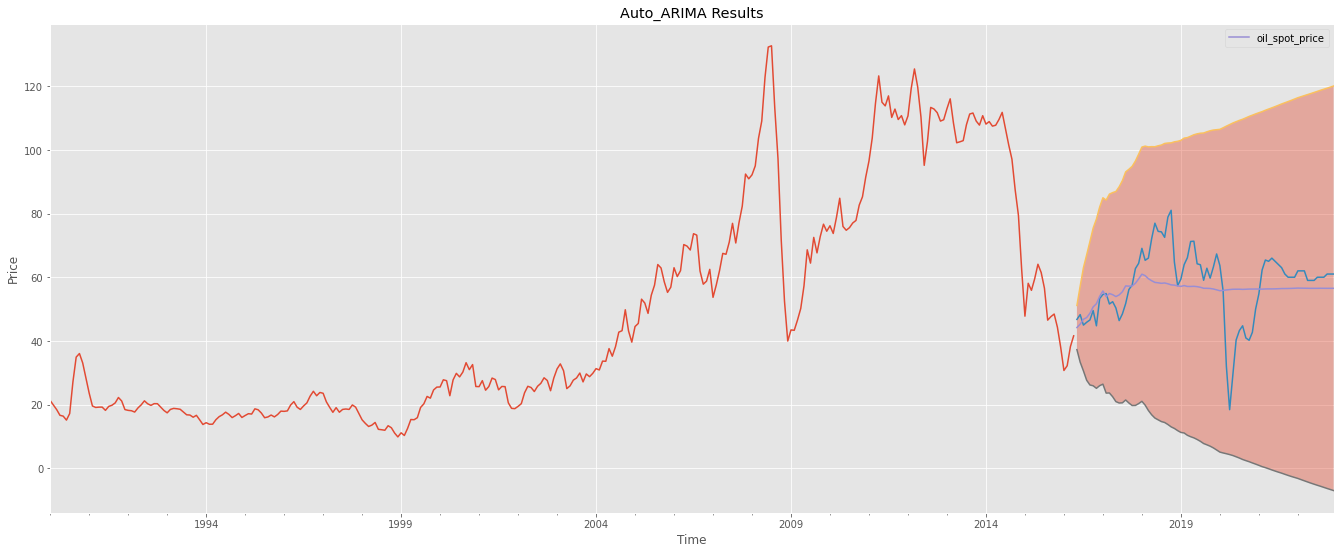

In [55]:
# нарисуйте пресказания
fig, ax = plt.subplots()
y_train_1['oil_spot_price'].plot(ax=ax)
y_test_1['oil_spot_price'].plot(ax=ax)
auto_arima.predict(fh).plot(ax=ax)
intervals['lower'].plot(ax=ax)
intervals['upper'].plot(ax=ax)
plt.fill_between(
    y_test_1.index.ravel(), intervals['lower'], intervals['upper'], alpha=0.4, label="Predicted 90% interval"
)
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Auto_ARIMA Results');

## Задание 4. Предсказание дневного временного ряда (3 балла).

В этом задании Вам предстоит попробовать предсказать выбранный Вами дневной временной ряд.

Аналогично, в качестве метрики используем MAE.



### NaiveForecaster из sktime (1 балл).

Посчитайте предсказания следующими двумя наивными способами:

* $\hat{y}_{t+1} = y_{t}$
* $\hat{y}_{t+1} = y_{t-seasonality+1}$

In [56]:
y_train_2 = y_train_2.asfreq('D')
y_test_2 = y_test_2.asfreq('D')

In [57]:
fh = ForecastingHorizon(y_test_2.index, is_relative=False)

In [58]:
from sktime.forecasting.naive import NaiveForecaster
naiv1 = NaiveForecaster('last',sp=1)
naiv1.fit(y_train_2)
mae(y_test_2,naiv1.predict(fh))
# ваш код обучения моделей здесь

/usr/local/lib/python3.7/dist-packages/sktime/forecasting/base/_fh.py:601: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if not hasattr(cutoff, "freqstr") or cutoff.freqstr is None:
/usr/local/lib/python3.7/dist-packages/sktime/forecasting/base/_fh.py:611: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  assert cutoff.freqstr == index.freqstr
/usr/local/lib/python3.7/dist-packages/sktime/utils/datetime.py:77: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if hasattr(x, "freqstr"):
/usr/local/lib/python3.7/dist-packages/sktime/utils/datetime.py:78: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if x.freqstr is None:
/usr/local/lib/python3.7/dist-packages/sktime/utils/datetime.py:80: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  elif "-" in x.freqstr:
/usr/local/lib/python3.7/

1665.9701435406728

In [59]:
naiv7 = NaiveForecaster('last',sp=365)
naiv7.fit(y_train_2)
mae(y_test_2,naiv7.predict(fh))

/usr/local/lib/python3.7/dist-packages/sktime/utils/datetime.py:105: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  if not hasattr(x, "freq") or x.freq is None:
/usr/local/lib/python3.7/dist-packages/sktime/utils/datetime.py:107: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  by *= x.freq
/usr/local/lib/python3.7/dist-packages/sktime/forecasting/base/_fh.py:601: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if not hasattr(cutoff, "freqstr") or cutoff.freqstr is None:
/usr/local/lib/python3.7/dist-packages/sktime/forecasting/base/_fh.py:611: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  assert cutoff.freqstr == index.freqstr
/usr/local/lib/python3.7/dist-packages/sktime/utils/datetime.py:77: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if hasattr(x, "freqstr"):
/usr/local/lib/pyt

2043.1231578947388

### KTR из orbit (1 балл).



In [60]:
from orbit.models import KTR
# ваш код обучения моделей здесь

In [61]:
y_train_2['date'] = y_train_2.index
y_test_2['date'] = y_test_2.index

In [62]:
y_train_2

,nuclear_capacity,date
2007-01-01,101764.9,2007-01-01
2007-01-02,101764.9,2007-01-02
2007-01-03,101764.9,2007-01-03
2007-01-04,101764.9,2007-01-04
2007-01-05,101764.9,2007-01-05
...,...,...
2018-06-07,99730.6,2018-06-07
2018-06-08,99730.6,2018-06-08
2018-06-09,99730.6,2018-06-09
2018-06-10,99730.6,2018-06-10


In [63]:
ktr = KTR(
    response_col='nuclear_capacity',
    date_col='date',
    seasonality=[365]
)
ktr.fit(y_train_2)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_ce583eb84b35032d795f7056cd3c761e NOW.
INFO:root:Guessed max_plate_nesting = 1


In [64]:
print(mae(y_test_2['nuclear_capacity'],ktr.predict(y_test_2)['prediction']))

2447.1270640846406


In [65]:
ktr_pred = ktr.predict(y_test_2)['prediction']
ktr_pred.index = y_test_2.index

In [66]:
# посчитайте метрики на test

### Phophet (1 балл).



In [70]:
from prophet.diagnostics import cross_validation, performance_metrics
import itertools
from prophet import Prophet

In [71]:
y_train_2['ds'] = y_train_2['date']
y_train_2['y'] = y_train_2['nuclear_capacity']

https://facebook.github.io/prophet/docs/diagnostics.html

In [72]:
param_grid = {  
    'changepoint_prior_scale': [0.00005,0.0001, 0.001],
    'seasonality_prior_scale': [0.001/2,0.001, 0.01],
}


all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
MAE = []


for params in tqdm(all_params):
    m = Prophet(yearly_seasonality=True,**params).fit(y_train_2)  # Fit model with given params
    df_cv = cross_validation(m, initial = 100, horizon='{} days'.format(len(y_test_2)), parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    MAE.append(df_p['mae'].values[0])

tuning_results = pd.DataFrame(all_params)
tuning_results['mae'] = MAE
print(tuning_results)

  0%|          | 0/9 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 6 forecasts with cutoffs between 2008-06-05 12:00:00 and 2015-08-01 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f03ab088bd0>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 6 forecasts with cutoffs between 2008-06-05 12:00:00 and 2015-08-01 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f033eb37b50>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 6 forecasts with cutoffs between 2008-06-05 12:00:00 and 2015-08-01 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f033e487090>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seaso

   changepoint_prior_scale  seasonality_prior_scale          mae
0                  0.00005                   0.0005  1339.610618
1                  0.00005                   0.0010  1283.000109
2                  0.00005                   0.0100  1461.021280
3                  0.00010                   0.0005  1491.245962
4                  0.00010                   0.0010  1392.647862
5                  0.00010                   0.0100  1410.882940
6                  0.00100                   0.0005  2034.332981
7                  0.00100                   0.0010  1796.258592
8                  0.00100                   0.0100  1805.768991


In [73]:
from prophet import Prophet
forecaster = Prophet(changepoint_prior_scale=0.00005,seasonality_prior_scale=0.0010,yearly_seasonality=True)
forecaster.fit(y_train_2[['ds','y']])
# ваш код обучения моделей здесь

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [74]:
y_test_2['ds'] = y_test_2['date']
y_test_2['y'] = y_test_2['nuclear_capacity']

In [75]:
# посчитайте метрики на test
mae(y_test_2['y'],forecaster.predict(y_test_2[['ds','y']])['yhat'])

1564.4227539179678

In [76]:
intervals = forecaster.predict(y_test_2[['ds','y']])[['yhat_lower','yhat_upper']]

In [77]:
intervals.index = y_test_2.index

In [78]:
pr = forecaster.predict(y_test_2[['ds','y']])['yhat']
pr.index = y_test_2.index

In [79]:
intervals

,yhat_lower,yhat_upper
2018-06-12,98144.492302,100658.427763
2018-06-13,98107.556951,100562.689505
2018-06-14,98130.301727,100564.093435
2018-06-15,98134.555278,100625.226683
2018-06-16,97993.459740,100480.652204
...,...,...
2021-04-17,97271.890570,99745.715486
2021-04-18,97319.694185,99742.597979
2021-04-19,97359.089248,99844.089624
2021-04-20,97387.303015,99827.224956


Нарисуйте для наилучшей модели предсказания с доверительным интервалом (если модель выдает его) и наложите их на истинные значения.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  import sys


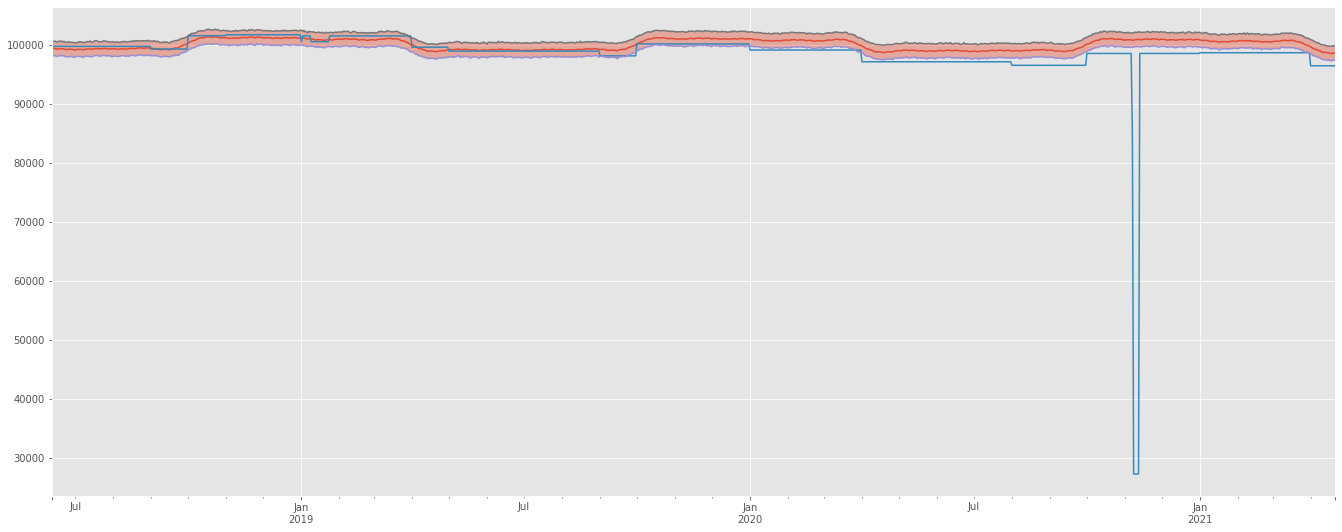

In [80]:
fig, ax = plt.subplots()
pr.plot(ax=ax)
y_test_2['y'].plot(ax=ax)
intervals['yhat_lower'].plot(ax=ax)
intervals['yhat_upper'].plot(ax=ax)
plt.fill_between(
    y_test_2.index.ravel(), intervals['yhat_lower'], intervals['yhat_upper'], alpha=0.4
)

## Задание 5. Предсказание временного ряда моделями машинного обучения (1 балл).

Возьмите один из ваших рядов, сформируйте по нему матрицу объект-признак и целевой вектор.

Разбейте данные на train/test в той же пропорции, что разбивали в заданиях выше.

Обучите различные классические модели машинного обучения и оцените их качество (MAE). 

Какая из моделей справилась с задачей предсказания лучше всего?

In [81]:
pip install catboost

     |████████████████████████████████| 76.6 MB 1.1 MB/s 


In [82]:
import catboost
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

In [83]:
y_train_1, y_test_1 = temporal_train_test_split(ts1, test_size=0.2)

In [88]:
from sktime.forecasting.compose import make_reduction
estimator = [catboost.CatBoostRegressor(),RandomForestRegressor(),Ridge()]
MAE = []
fh = ForecastingHorizon(y_test_1.index, is_relative=False)
for m in estimator:
  model = make_reduction(estimator=m, strategy='direct', window_length=100, scitype='tabular-regressor', transformers=None)
  model.fit(y_train_1,fh=fh)
  MAE.append([m,mae(y_test_1,model.predict(fh))])

In [86]:
print(MAE)

[[<catboost.core.CatBoostRegressor object at 0x7f033eaeb290>, 32.09108451565832], [RandomForestRegressor(), 34.71774625000002], [Ridge(), 453.4402133822417]]


In [89]:
model = make_reduction(estimator=estimator[0], strategy='direct', window_length=100, scitype='tabular-regressor', transformers=None)
model.fit(y_train_1,fh=fh)
print('MAE на Градиентом бустинге при прямой стратегии:', mae(y_test_1,model.predict(fh=fh)))

MAE на Градиентом бустинге при прямой стратегии: 32.09108451565832


## Бонус. Напишите свою модель на STAN (3 балла).

Разработайте и испытайте свою модель для месячного ряда в STAN.

Сравните качество прогнозов с наивной сезонной моделью на тестовой выборке с помощью MAE. 

Комментарий: итоговый балл за домашнее задание ставится по формуле минимум(10, ваш суммарный балл за задания).